In [1]:
# Import Libs

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (15, 9)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read csv files

cab = pd.read_csv("Cab_Data.csv")
city = pd.read_csv("City.csv")
customer = pd.read_csv("Customer_ID.csv")
transaction = pd.read_csv("Transaction_ID.csv")

In [3]:
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,06-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,02-01-2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,07-01-2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,03-01-2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [5]:
customer.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [6]:
transaction.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [3]:
df_1 = pd.merge(cab, city, on="City")
df_1.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,10000011,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701"
1,10000012,06-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701"
2,10000013,02-01-2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701"
3,10000014,07-01-2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701"
4,10000015,03-01-2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701"


In [4]:
df_2 = pd.merge(customer, transaction, on="Customer ID")
df_2.head()

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode
0,29290,Male,28,10813,10000011,Card
1,29290,Male,28,10813,10351127,Cash
2,29290,Male,28,10813,10412921,Card
3,27703,Male,27,9237,10000012,Card
4,27703,Male,27,9237,10320494,Card


In [5]:
df = pd.merge(df_1, df_2, on="Transaction ID")
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode
0,10000011,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701",29290,Male,28,10813,Card
1,10000012,06-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701",27703,Male,27,9237,Card
2,10000013,02-01-2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701",28712,Male,53,11242,Cash
3,10000014,07-01-2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701",28020,Male,23,23327,Cash
4,10000015,03-01-2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701",27182,Male,33,8536,Card


In [6]:
# To analyse trends over a time period

df['Date of Travel'] = pd.to_datetime(df['Date of Travel'])
df['Day'] = df['Date of Travel'].dt.day
df['Weekday'] = df['Date of Travel'].dt.weekday
df['Month'] = df['Date of Travel'].dt.month
df['Year'] = df['Date of Travel'].dt.year
df['Profit'] = df['Price Charged'] - df['Cost of Trip']
df['Profit Percentage per Trip'] = (((df['Price Charged'] - df['Cost of Trip']) / df['Cost of Trip'])*100).round(2)
df['Profit per KM'] = (((df['Price Charged'] - df['Cost of Trip']) / df['KM Travelled']))
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,...,Age,Income (USD/Month),Payment_Mode,Day,Weekday,Month,Year,Profit,Profit Percentage per Trip,Profit per KM
0,10000011,2016-08-01,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701",29290,...,28,10813,Card,1,0,8,2016,57.315,18.27,1.882266
1,10000012,2016-06-01,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701",27703,...,27,9237,Card,1,2,6,2016,23.666,7.07,0.826904
2,10000013,2016-02-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701",28712,...,53,11242,Cash,1,0,2,2016,27.568,28.24,3.049558
3,10000014,2016-07-01,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701",28020,...,23,23327,Cash,1,4,7,2016,25.798,7.34,0.777751
4,10000015,2016-03-01,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701",27182,...,33,8536,Card,1,1,3,2016,16.844,17.23,1.929439


In [8]:
df['Weekday'].unique()

array([0, 2, 4, 1, 3, 6, 5], dtype=int64)

In [7]:
df.sort_values(by='Date of Travel', inplace=True)
df.set_index('Date of Travel', inplace=True)
df.head()

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,Day,Weekday,Month,Year,Profit,Profit Percentage per Trip,Profit per KM
Date of Travel,,,,,,,,,,,,,,,,,,,,
2016-01-02,10004899,Yellow Cab,LOS ANGELES CA,25.53,402.89,327.8052,"1,595,037","144,132",7219,Male,18,13980,Cash,2,5,1,2016,75.0848,22.91,2.941042
2016-01-02,10005402,Yellow Cab,WASHINGTON DC,44.08,694.53,587.1456,"418,859","127,001",53869,Female,34,6570,Card,2,5,1,2016,107.3844,18.29,2.436125
2016-01-02,10004271,Pink Cab,BOSTON MA,38.61,358.05,405.4050,"248,968","80,021",59321,Male,45,22849,Cash,2,5,1,2016,-47.3550,-11.68,-1.226496
2016-01-02,10004399,Pink Cab,SAN DIEGO CA,4.72,50.88,51.9200,"959,307","69,995",19497,Male,30,11978,Card,2,5,1,2016,-1.0400,-2.00,-0.220339
2016-01-02,10005419,Yellow Cab,WASHINGTON DC,46.00,765.04,552.0000,"418,859","127,001",53389,Male,26,2702,Cash,2,5,1,2016,213.0400,38.59,4.631304


In [10]:
df.tail()

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,Day,Weekday,Month,Year,Profit,Profit Percentage per Trip
Date of Travel,,,,,,,,,,,,,,,,,,,
2018-12-31,10435303,Yellow Cab,NEW YORK NY,39.20,1000.88,508.0320,"8,405,837","302,149",46,Female,37,19348,Card,31,0,12,2018,492.8480,97.01
2018-12-31,10435591,Yellow Cab,NEW YORK NY,37.74,918.58,511.7544,"8,405,837","302,149",1049,Female,40,23646,Card,31,0,12,2018,406.8256,79.50
2018-12-31,10434932,Yellow Cab,LOS ANGELES CA,22.88,396.35,315.7440,"1,595,037","144,132",6646,Female,31,7722,Cash,31,0,12,2018,80.6060,25.53
2018-12-31,10437814,Yellow Cab,BOSTON MA,17.10,238.07,240.0840,"248,968","80,021",59185,Female,42,11396,Card,31,0,12,2018,-2.0140,-0.84
2018-12-31,10438259,Yellow Cab,DALLAS TX,34.00,635.45,428.4000,"942,908","22,157",25004,Female,40,10758,Cash,31,0,12,2018,207.0500,48.33


In [11]:
df.shape

(359392, 19)

In [12]:
df.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),Day,Weekday,Month,Year,Profit,Profit Percentage per Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113,19191.652115,35.336705,15048.822937,15.972835,3.463461,7.156047,2017.045199,137.253198,47.523121
std,1.268058e+05,12.233526,274.378911,157.993661,21012.412463,12.594234,7969.409482,8.503010,1.940577,3.413283,0.800239,160.311840,42.571507
min,1.000001e+07,1.900000,15.600000,19.000000,1.000000,18.000000,2000.000000,1.000000,0.000000,1.000000,2016.000000,-220.060000,-40.930000
25%,1.011081e+07,12.000000,206.437500,151.200000,2705.000000,25.000000,8424.000000,9.000000,2.000000,4.000000,2016.000000,28.012000,16.080000
50%,1.022104e+07,22.440000,386.360000,282.480000,7459.000000,33.000000,14685.000000,16.000000,4.000000,8.000000,2017.000000,81.962000,35.930000
75%,1.033094e+07,32.960000,583.660000,413.683200,36078.000000,42.000000,21035.000000,23.000000,5.000000,10.000000,2018.000000,190.030000,71.270000
max,1.044011e+07,48.000000,2048.030000,691.200000,60000.000000,65.000000,35000.000000,31.000000,6.000000,12.000000,2018.000000,1463.966000,320.210000


### From the above table it is clear that Price Charged and Profit has some outliers

In [13]:
df.isnull().sum()

Transaction ID                0
Company                       0
City                          0
KM Travelled                  0
Price Charged                 0
Cost of Trip                  0
Population                    0
Users                         0
Customer ID                   0
Gender                        0
Age                           0
Income (USD/Month)            0
Payment_Mode                  0
Day                           0
Weekday                       0
Month                         0
Year                          0
Profit                        0
Profit Percentage per Trip    0
dtype: int64

### There are no missing values

In [14]:
df.nunique()

Transaction ID                359392
Company                            2
City                              19
KM Travelled                     874
Price Charged                  99176
Cost of Trip                   16291
Population                        19
Users                             19
Customer ID                    46148
Gender                             2
Age                               48
Income (USD/Month)             22725
Payment_Mode                       2
Day                               31
Weekday                            7
Month                             12
Year                               3
Profit                        303907
Profit Percentage per Trip     21939
dtype: int64

### There are 2 cab service provider in 19 different cities

In [17]:
df['City'].value_counts()

NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: City, dtype: int64

### New York city has most no. of cabs running

In [8]:
city_grp = df.groupby('City')

In [9]:
city_grp['Company'].value_counts()

City            Company   
ATLANTA GA      Yellow Cab     5795
                Pink Cab       1762
AUSTIN TX       Yellow Cab     3028
                Pink Cab       1868
BOSTON MA       Yellow Cab    24506
                Pink Cab       5186
CHICAGO IL      Yellow Cab    47264
                Pink Cab       9361
DALLAS TX       Yellow Cab     5637
                Pink Cab       1380
DENVER CO       Yellow Cab     2431
                Pink Cab       1394
LOS ANGELES CA  Yellow Cab    28168
                Pink Cab      19865
MIAMI FL        Yellow Cab     4452
                Pink Cab       2002
NASHVILLE TN    Pink Cab       1841
                Yellow Cab     1169
NEW YORK NY     Yellow Cab    85918
                Pink Cab      13967
ORANGE COUNTY   Yellow Cab     2469
                Pink Cab       1513
PHOENIX AZ      Yellow Cab     1200
                Pink Cab        864
PITTSBURGH PA   Pink Cab        682
                Yellow Cab      631
SACRAMENTO CA   Pink Cab       1334
 

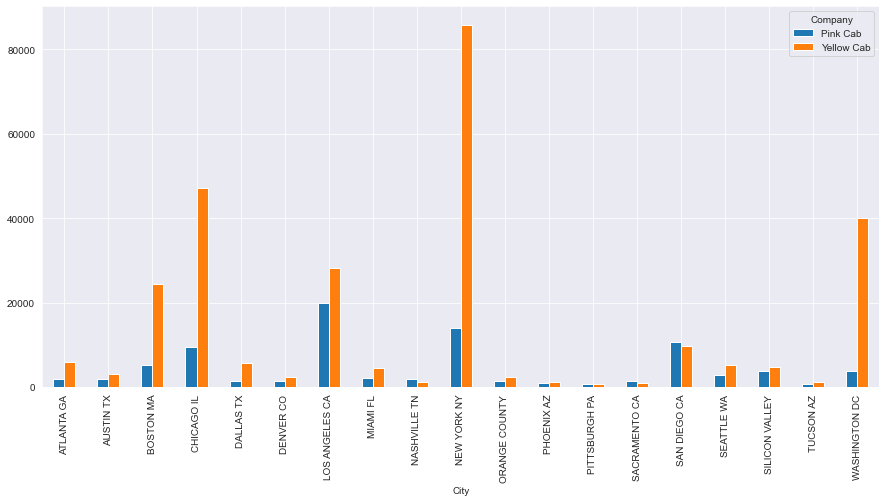

In [14]:
city_grp['Company'].value_counts().unstack().plot(kind='bar', figsize=(15, 7));

In [30]:
month_year_group = df.groupby(['Month', 'Year'])

In [31]:
month_year_group[['KM Travelled', 'Price Charged', 'Cost of Trip', 'Profit']].sum()

KM Travelled  Price Charged  Cost of Trip        Profit
Month Year                                                         
1     2016     138068.43     2755898.53  1.756214e+06  9.996849e+05
      2017     193346.05     3786998.12  2.460543e+06  1.326455e+06
      2018     162301.66     2998680.06  2.061021e+06  9.376593e+05
2     2016     157532.50     3200586.72  2.005736e+06  1.194851e+06
      2017     169095.46     3369813.30  2.156083e+06  1.213730e+06
      2018     170600.93     3221129.08  2.168607e+06  1.052522e+06
3     2016     174858.52     3396568.07  2.223414e+06  1.173154e+06
      2017     219862.64     4439176.10  2.793424e+06  1.645752e+06
      2018     202497.13     3745988.95  2.573082e+06  1.172907e+06
4     2016     164818.02     3203200.62  2.101484e+06  1.101717e+06
      2017     191899.27     3740866.21  2.447066e+06  1.293801e+06
      2018     189646.38     3499973.45  2.410818e+06  1.089156e+06
5     2016     181888.11     3649288.69  2.313594e+06  1.335694e+06
      2017     214693.65     4420160.29  2.735884e+06  1.684276e+06
      2018     218659.14     4131922.81  2.772322e+06  1.359601e+06
6     2016     176024.41     3529648.47  2.232464e+06  1.297184e+06
      2017     209103.26     4081459.03  2.648435e+06  1.433024e+06
      2018     222463.05     4089495.01  2.821466e+06  1.268029e+06
7     2016     201147.19     3777186.45  2.554399e+06  1.222788e+06
      2017     236481.06     4367508.42  2.999501e+06  1.368007e+06
      2018     247078.58     4320124.50  3.134590e+06  1.185534e+06
8     2016     208689.92     3692040.87  2.641243e+06  1.050798e+06
      2017     268080.39     4916979.93  3.392751e+06  1.524229e+06
      2018     245289.71     4239608.30  3.104790e+06  1.134818e+06
9     2016     220623.61     4182481.82  2.790184e+06  1.392298e+06
      2017     274340.26     5180579.53  3.469383e+06  1.711197e+06
      2018     268617.20     4849043.91  3.394132e+06  1.454912e+06
10    2016     277797.29     5137440.42  3.518033e+06  1.619408e+06
      2017     329666.92     6066609.06  4.164009e+06  1.902600e+06
      2018     278404.21     4982777.62  3.520848e+06  1.461929e+06
11    2016     253565.02     4806042.82  3.209934e+06  1.596109e+06
      2017     269565.71     4846981.22  3.414076e+06  1.432905e+06
      2018     272682.42     4721711.36  3.450007e+06  1.271705e+06
12    2016     268474.86     5059228.93  3.402409e+06  1.656820e+06
      2017     324567.87     6180408.37  4.106751e+06  2.073657e+06
      2018     308059.75     5594531.48  3.905742e+06  1.688789e+06

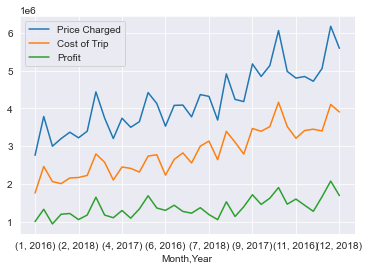

In [34]:
month_year_group[['Price Charged', 'Cost of Trip', 'Profit']].sum().plot();

In [13]:
month_year_group[['KM Travelled', 'Price Charged', 'Cost of Trip', 'Profit']].median()

KM Travelled  Price Charged  Cost of Trip    Profit
Month Year                                                     
1     2016        22.680        407.660      288.0000  101.3955
      2017        22.310        401.940      280.0000  102.5436
      2018        22.470        383.620      283.4040   78.1024
2     2016        22.230        411.300      281.1840  105.1704
      2017        22.800        411.020      290.0160   98.8360
      2018        22.420        393.410      283.5500   83.3908
3     2016        22.660        406.075      288.5112   99.0996
      2017        22.310        402.960      282.5550  100.4620
      2018        22.400        382.230      282.3840   80.1816
4     2016        22.470        403.590      282.4800   94.0260
      2017        22.200        387.040      280.6230   84.4970
      2018        22.770        386.445      287.6556   75.0600
5     2016        22.140        400.280      280.6461   97.5768
      2017        22.000        408.520      277.3584  106.3420
      2018        22.440        386.140      282.1968   83.5194
6     2016        22.540        403.880      281.1840  101.4520
      2017        22.680        393.990      285.0000   92.0100
      2018        22.040        370.350      275.7700   71.1640
7     2016        22.880        389.480      287.2800   75.8940
      2017        22.420        379.950      280.9188   75.5400
      2018        22.470        362.310      282.9570   56.7342
8     2016        22.440        370.600      283.5500   66.4040
      2017        22.420        382.815      282.6912   79.0450
      2018        22.040        353.900      275.8800   56.9450
9     2016        22.310        385.220      279.7200   86.2068
      2017        22.610        396.050      284.7600   89.8596
      2018        22.310        374.410      278.3880   72.2480
10    2016        22.310        381.710      280.0776   84.6760
      2017        22.455        383.950      282.2400   86.0140
      2018        22.610        375.145      282.4920   70.9784
11    2016        22.540        391.340      282.9168   85.1220
      2017        22.540        371.785      281.8080   71.8090
      2018        22.670        366.710      284.5440   58.1984
12    2016        22.600        393.375      282.4800   91.5096
      2017        22.610        398.510      283.1760   95.3624
      2018        22.540        382.470      282.9204   73.1400

In [10]:
month_group = df.groupby(['Month'])

In [17]:
weekday_group = df.groupby(['Weekday'])

In [11]:
month_group[['KM Travelled', 'Price Charged', 'Cost of Trip', 'Profit']].sum()

,KM Travelled,Price Charged,Cost of Trip,Profit
Month,,,,
1,493716.14,9541576.71,6.277777e+06,3.263800e+06
2,497228.89,9791529.10,6.330425e+06,3.461104e+06
3,597218.29,11581733.12,7.589920e+06,3.991813e+06
4,546363.67,10444040.28,6.959367e+06,3.484673e+06
5,615240.90,12201371.79,7.821800e+06,4.379572e+06
6,607590.72,11700602.51,7.702366e+06,3.998237e+06
7,684706.83,12464819.37,8.688491e+06,3.776329e+06
8,722060.02,12848629.10,9.138784e+06,3.709845e+06
9,763581.07,14212105.26,9.653698e+06,4.558407e+06


In [21]:
weekday_group[['KM Travelled', 'Price Charged', 'Cost of Trip', 'Profit']].median()

,KM Travelled,Price Charged,Cost of Trip,Profit
Weekday,,,,
0,22.31,376.790,280.4760,73.5640
1,22.44,380.030,282.8520,75.9660
2,22.42,377.340,281.4372,73.8000
3,22.31,374.575,280.3248,71.8356
4,22.54,390.910,282.9204,86.0720
5,22.54,394.020,282.4920,89.6004
6,22.54,397.070,284.2800,91.4540


In [8]:
df['Total Price Charged'] = df['Price Charged'].cumsum()

In [9]:
df['Total Cost of Trip'] = df['Cost of Trip'].cumsum()

In [10]:
df['Total Profit'] = df['Profit'].cumsum()

In [11]:
df.head()

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Gender,...,Day,Weekday,Month,Year,Profit,Profit Percentage per Trip,Profit per KM,Total Price Charged,Total Cost of Trip,Total Profit
Date of Travel,,,,,,,,,,,,,,,,,,,,,
2016-01-02,10004899,Yellow Cab,LOS ANGELES CA,25.53,402.89,327.8052,"1,595,037","144,132",7219,Male,...,2,5,1,2016,75.0848,22.91,2.941042,402.89,327.8052,75.0848
2016-01-02,10005402,Yellow Cab,WASHINGTON DC,44.08,694.53,587.1456,"418,859","127,001",53869,Female,...,2,5,1,2016,107.3844,18.29,2.436125,1097.42,914.9508,182.4692
2016-01-02,10004271,Pink Cab,BOSTON MA,38.61,358.05,405.4050,"248,968","80,021",59321,Male,...,2,5,1,2016,-47.3550,-11.68,-1.226496,1455.47,1320.3558,135.1142
2016-01-02,10004399,Pink Cab,SAN DIEGO CA,4.72,50.88,51.9200,"959,307","69,995",19497,Male,...,2,5,1,2016,-1.0400,-2.00,-0.220339,1506.35,1372.2758,134.0742
2016-01-02,10005419,Yellow Cab,WASHINGTON DC,46.00,765.04,552.0000,"418,859","127,001",53389,Male,...,2,5,1,2016,213.0400,38.59,4.631304,2271.39,1924.2758,347.1142


In [12]:
df.tail()

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Gender,...,Day,Weekday,Month,Year,Profit,Profit Percentage per Trip,Profit per KM,Total Price Charged,Total Cost of Trip,Total Profit
Date of Travel,,,,,,,,,,,,,,,,,,,,,
2018-12-31,10435303,Yellow Cab,NEW YORK NY,39.20,1000.88,508.0320,"8,405,837","302,149",46,Female,...,31,0,12,2018,492.8480,97.01,12.572653,1.521800e+08,1.028529e+08,4.932701e+07
2018-12-31,10435591,Yellow Cab,NEW YORK NY,37.74,918.58,511.7544,"8,405,837","302,149",1049,Female,...,31,0,12,2018,406.8256,79.50,10.779693,1.521809e+08,1.028535e+08,4.932742e+07
2018-12-31,10434932,Yellow Cab,LOS ANGELES CA,22.88,396.35,315.7440,"1,595,037","144,132",6646,Female,...,31,0,12,2018,80.6060,25.53,3.522990,1.521813e+08,1.028538e+08,4.932750e+07
2018-12-31,10437814,Yellow Cab,BOSTON MA,17.10,238.07,240.0840,"248,968","80,021",59185,Female,...,31,0,12,2018,-2.0140,-0.84,-0.117778,1.521815e+08,1.028540e+08,4.932749e+07
2018-12-31,10438259,Yellow Cab,DALLAS TX,34.00,635.45,428.4000,"942,908","22,157",25004,Female,...,31,0,12,2018,207.0500,48.33,6.089706,1.521821e+08,1.028544e+08,4.932770e+07


In [26]:
df.columns

Index(['Transaction ID', 'Company', 'City', 'KM Travelled', 'Price Charged',
       'Cost of Trip', 'Population', 'Users', 'Customer ID', 'Gender', 'Age',
       'Income (USD/Month)', 'Payment_Mode', 'Day', 'Week', 'Month', 'Year',
       'Profit', 'Total Price Charged', 'Total Cost of Trip', 'Total Profit'],
      dtype='object')

In [13]:
df['Population'] = df['Population'].str.replace(',', '').astype(float)
df['Users'] = df['Users'].str.replace(',', '').astype(float)

In [14]:
df['Users Density'] = df['Population'] / df['Users']
df.head()

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Gender,...,Weekday,Month,Year,Profit,Profit Percentage per Trip,Profit per KM,Total Price Charged,Total Cost of Trip,Total Profit,Users Density
Date of Travel,,,,,,,,,,,,,,,,,,,,,
2016-01-02,10004899,Yellow Cab,LOS ANGELES CA,25.53,402.89,327.8052,1595037.0,144132.0,7219,Male,...,5,1,2016,75.0848,22.91,2.941042,402.89,327.8052,75.0848,11.066502
2016-01-02,10005402,Yellow Cab,WASHINGTON DC,44.08,694.53,587.1456,418859.0,127001.0,53869,Female,...,5,1,2016,107.3844,18.29,2.436125,1097.42,914.9508,182.4692,3.298076
2016-01-02,10004271,Pink Cab,BOSTON MA,38.61,358.05,405.4050,248968.0,80021.0,59321,Male,...,5,1,2016,-47.3550,-11.68,-1.226496,1455.47,1320.3558,135.1142,3.111283
2016-01-02,10004399,Pink Cab,SAN DIEGO CA,4.72,50.88,51.9200,959307.0,69995.0,19497,Male,...,5,1,2016,-1.0400,-2.00,-0.220339,1506.35,1372.2758,134.0742,13.705365
2016-01-02,10005419,Yellow Cab,WASHINGTON DC,46.00,765.04,552.0000,418859.0,127001.0,53389,Male,...,5,1,2016,213.0400,38.59,4.631304,2271.39,1924.2758,347.1142,3.298076


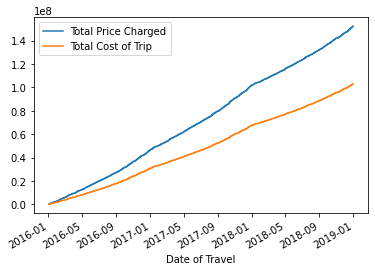

In [51]:
df['Total Price Charged'].plot();
df['Total Cost of Trip'].plot();
plt.legend();

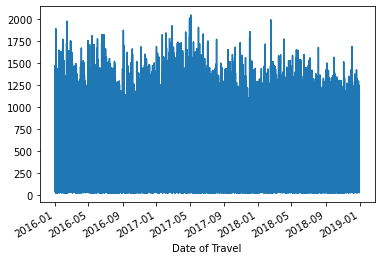

In [58]:
df['Price Charged'].plot();

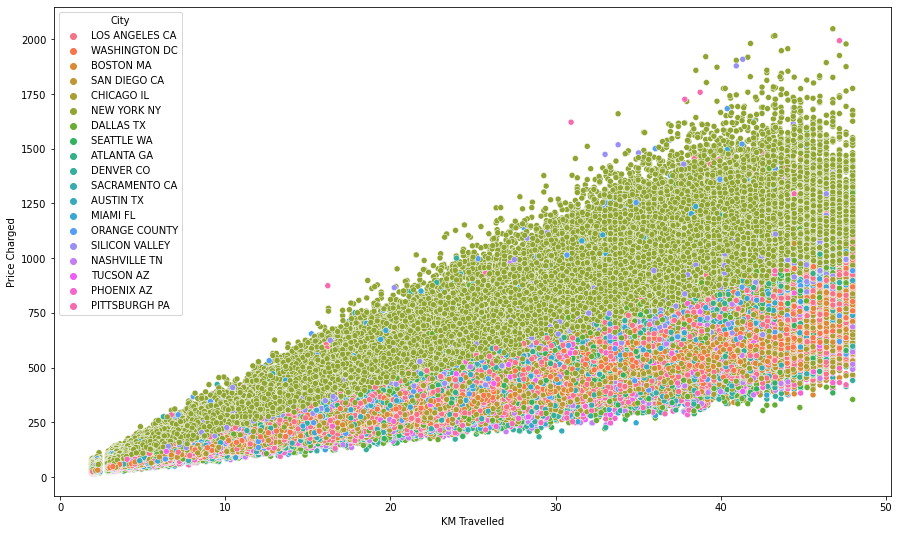

In [64]:
plt.figure(figsize=(15,9))
sns.scatterplot(df['KM Travelled'], df['Price Charged'], hue=df['City']);
plt.show()

In [ ]:
# plt.bar(x='Year', height='Profit', data=df);

In [ ]:
# plt.bar(x='Year', height='Profit', data=df);
# plt.plot(df['Year'], df['Profit'], 'o--r');

In [22]:
# plt.bar(df['Year'], df['Profit'], bottom=df[df['Company']=='Pink']);

In [16]:
month_year_group[['Profit']].mean()

Profit
Month Year            
1     2016  163.990312
      2017  154.724750
      2018  130.720667
2     2016  169.602719
      2017  163.157711
      2018  139.462334
3     2016  152.595510
      2017  168.501246
      2018  129.990851
4     2016  151.189370
      2017  151.427977
      2018  130.219478
5     2016  164.090232
      2017  175.830028
      2018  139.589447
6     2016  166.327017
      2017  154.804335
      2018  128.304015
7     2016  139.047946
      2017  130.075779
      2018  108.625081
8     2016  113.882974
      2017  128.670349
      2018  103.494569
9     2016  142.056719
      2017  141.036572
      2018  121.638002
10    2016  131.030647
      2017  130.852841
      2018  118.759497
11    2016  142.522444
      2017  119.748051
      2018  105.518134
12    2016  139.416029
      2017  144.515811
      2018  123.893276

In [26]:
# plt.bar(month_year_group.index, month_year_group.Profit)

# month_year_group = month_year_group.set_index(['Month', 'Year']).value
# month_year_group.unstack().plot(kind='bar', stacked=True).

type(month_year_group)

pandas.core.groupby.generic.DataFrameGroupBy

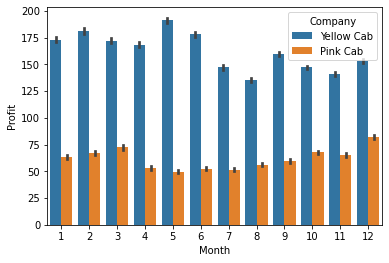

In [31]:
sns.barplot('Month', 'Profit', data=df, hue='Company')

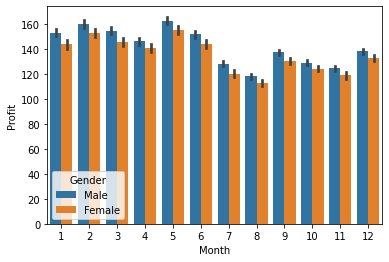

In [34]:
sns.barplot('Month', 'Profit', data=df, hue='Gender')

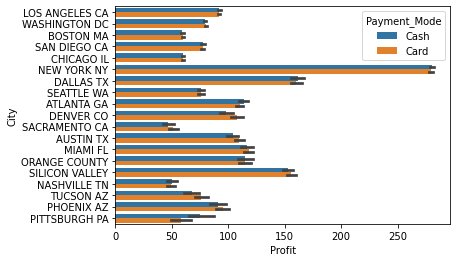

In [36]:
sns.barplot('Profit', 'City', data=df, hue='Payment_Mode')

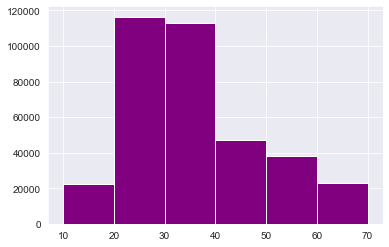

In [49]:
plt.hist(df.Age, bins=np.arange(10, 80, 10), color='purple');

In [27]:
# bins = [10, 18, 25, 45]
# labels = ['Child (10-18yrs)', 'Young Adult (19-25yrs)' 'Adult(26-45yrs)', 'Elder (46-80yrs)']
# df['Age_Group'] = pd.cut(df.Age, bins, labels = labels, include_lowest = True)
# df

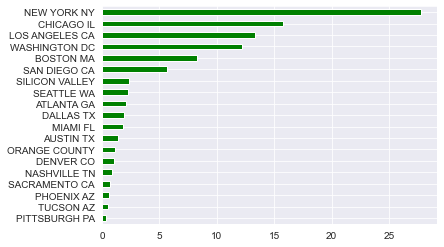

In [64]:
(df.City.value_counts(normalize=True, ascending=True)*100).plot(kind='barh', color='g')

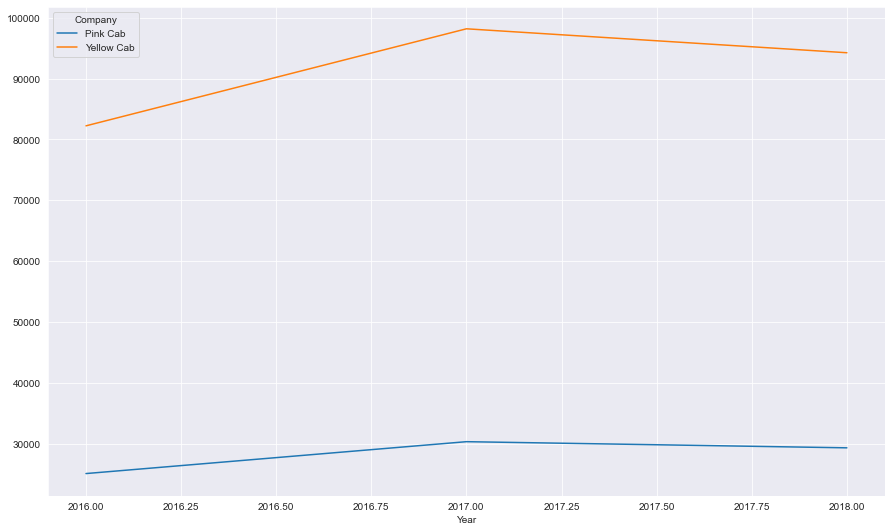

In [69]:
fig, ax = plt.subplots(figsize=(15, 9))
df.groupby(['Year', 'Company']).count()['Profit'].unstack().plot(ax=ax);

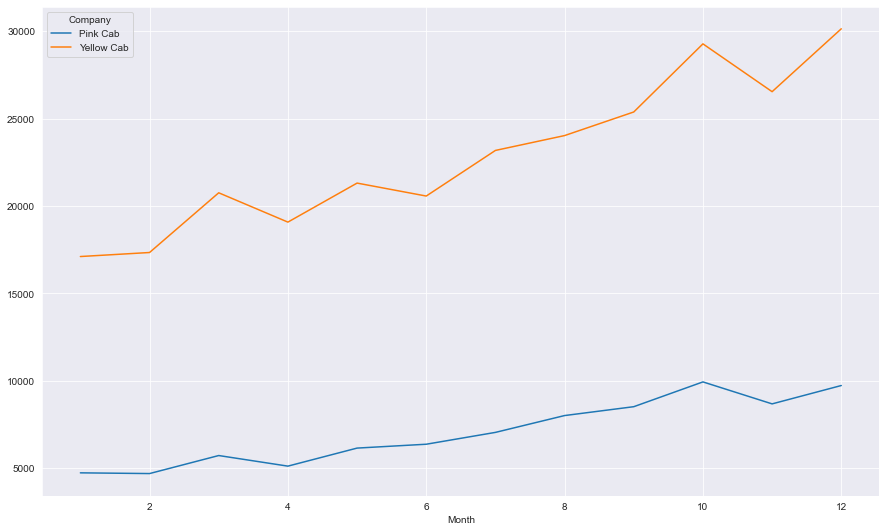

In [68]:
fig, ax = plt.subplots(figsize=(15, 9))
df.groupby(['Month', 'Company']).count()['Profit'].unstack().plot(ax=ax);

In [15]:
df['Price Charged per KM'] = df['Price Charged'] / df['KM Travelled']

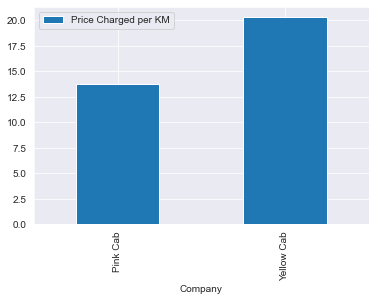

In [16]:
df[['Price Charged per KM', 'Company']].groupby('Company').mean().plot(kind='bar')
plt.show()

In [22]:
df.columns

Index(['Transaction ID', 'Company', 'City', 'KM Travelled', 'Price Charged',
       'Cost of Trip', 'Population', 'Users', 'Customer ID', 'Gender', 'Age',
       'Income (USD/Month)', 'Payment_Mode', 'Day', 'Weekday', 'Month', 'Year',
       'Profit', 'Profit Percentage per Trip', 'Price Charged per KM'],
      dtype='object')

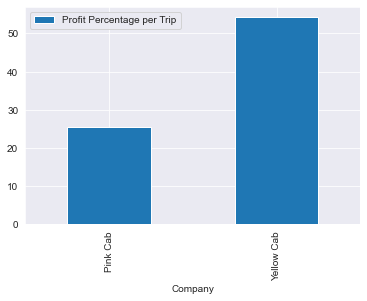

In [28]:
df[['Profit Percentage per Trip', 'Company']].groupby('Company').mean().plot(kind='bar')
plt.show()

In [11]:
df

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,Day,Weekday,Month,Year,Profit,Profit Percentage per Trip,Profit per KM
Date of Travel,,,,,,,,,,,,,,,,,,,,
2016-01-02,10004899,Yellow Cab,LOS ANGELES CA,25.53,402.89,327.8052,"1,595,037","144,132",7219,Male,18,13980,Cash,2,5,1,2016,75.0848,22.91,2.941042
2016-01-02,10005402,Yellow Cab,WASHINGTON DC,44.08,694.53,587.1456,"418,859","127,001",53869,Female,34,6570,Card,2,5,1,2016,107.3844,18.29,2.436125
2016-01-02,10004271,Pink Cab,BOSTON MA,38.61,358.05,405.4050,"248,968","80,021",59321,Male,45,22849,Cash,2,5,1,2016,-47.3550,-11.68,-1.226496
2016-01-02,10004399,Pink Cab,SAN DIEGO CA,4.72,50.88,51.9200,"959,307","69,995",19497,Male,30,11978,Card,2,5,1,2016,-1.0400,-2.00,-0.220339
2016-01-02,10005419,Yellow Cab,WASHINGTON DC,46.00,765.04,552.0000,"418,859","127,001",53389,Male,26,2702,Cash,2,5,1,2016,213.0400,38.59,4.631304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31,10435303,Yellow Cab,NEW YORK NY,39.20,1000.88,508.0320,"8,405,837","302,149",46,Female,37,19348,Card,31,0,12,2018,492.8480,97.01,12.572653
2018-12-31,10435591,Yellow Cab,NEW YORK NY,37.74,918.58,511.7544,"8,405,837","302,149",1049,Female,40,23646,Card,31,0,12,2018,406.8256,79.50,10.779693
2018-12-31,10434932,Yellow Cab,LOS ANGELES CA,22.88,396.35,315.7440,"1,595,037","144,132",6646,Female,31,7722,Cash,31,0,12,2018,80.6060,25.53,3.522990


In [19]:
df.groupby('Company')[['Profit', 'Profit per KM']].sum()

,Profit,Profit per KM
Company,,
Pink Cab,5.307328e+06,2.346417e+05
Yellow Cab,4.402037e+07,1.951748e+06


In [18]:
df.pivot_table(index='Company', columns='Year', values='Profit', aggfunc='sum', margins=True)

Year,2016,2017,2018,All
Company,,,,
Pink Cab,1.713511e+06,2.033655e+06,1.560162e+06,5.307328e+06
Yellow Cab,1.392700e+07,1.657598e+07,1.351740e+07,4.402037e+07
All,1.564051e+07,1.860963e+07,1.507756e+07,4.932770e+07


### Distribution of the two cab services across different cities

In [20]:
city_grp['Income (USD/Month)'].agg(['median', 'mean', 'min', 'max'])

,median,mean,min,max
City,,,,
ATLANTA GA,14655,14933.150986,2029,34972
AUSTIN TX,14374,14696.495711,2027,34921
BOSTON MA,14743,15128.563317,2019,34985
CHICAGO IL,14527,15101.718269,2007,34901
DALLAS TX,14242,14846.508194,2007,34996
DENVER CO,14580,14975.655163,2022,35000
LOS ANGELES CA,14889,15064.550455,2007,34984
MIAMI FL,14759,14984.887202,2013,34862
NASHVILLE TN,14195,14734.359801,2002,34960


### Each city has more or less similiar Income range

In [21]:
city_cabs = city_grp['Company'].value_counts()

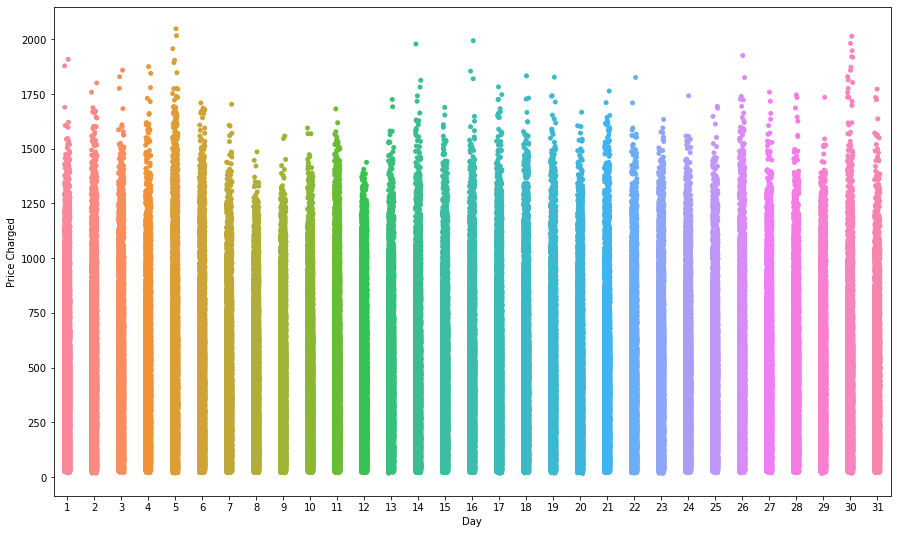

In [22]:
plt.figure(figsize=(15,9))
sns.stripplot(x="Day", y="Price Charged", data = df)
plt.show()

### There is some amount of seasonality over a month

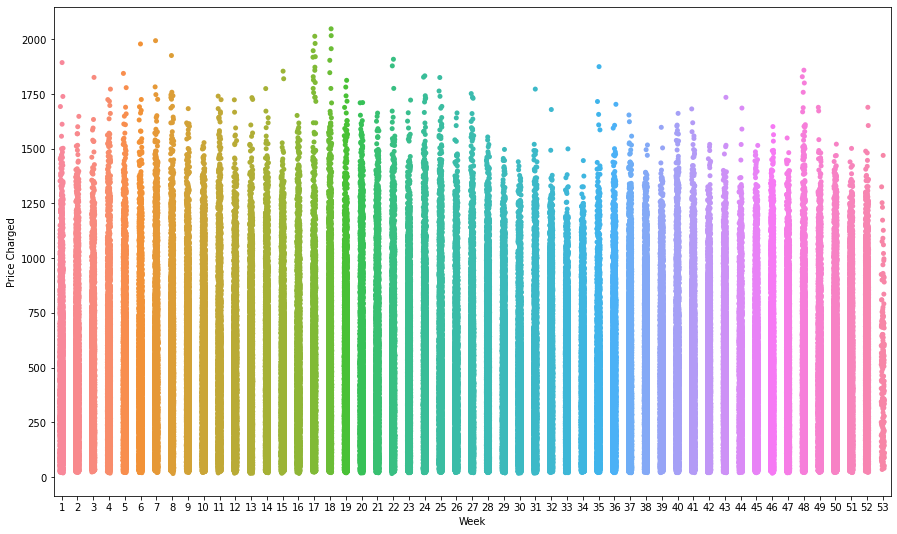

In [23]:
plt.figure(figsize=(15,9))
sns.stripplot(x="Week", y="Price Charged", data = df)
plt.show()

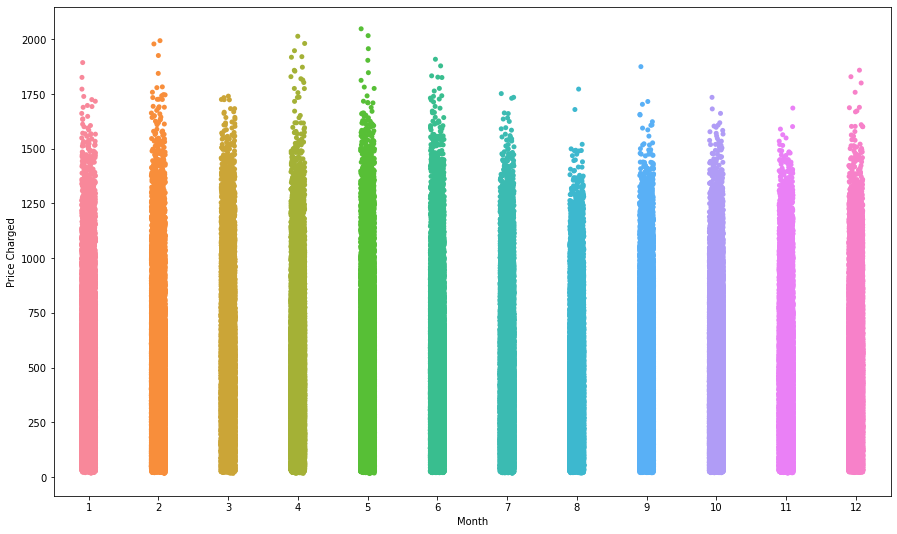

In [24]:
plt.figure(figsize=(15,9))
sns.stripplot(x="Month", y="Price Charged", data = df)
plt.show()

### In the 2nd quarter i.e. during the months of April, May and June no. of cabs taken is higher in a year

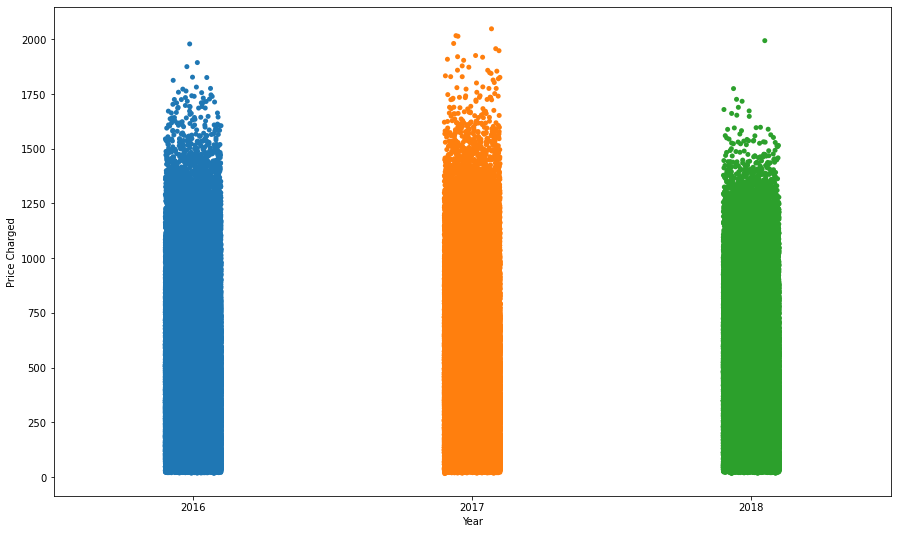

In [25]:
plt.figure(figsize=(15,9))
sns.stripplot(x="Year", y="Price Charged", data = df)
plt.show()

### In 2018 price charged was comparatively less than 2017 and 2016

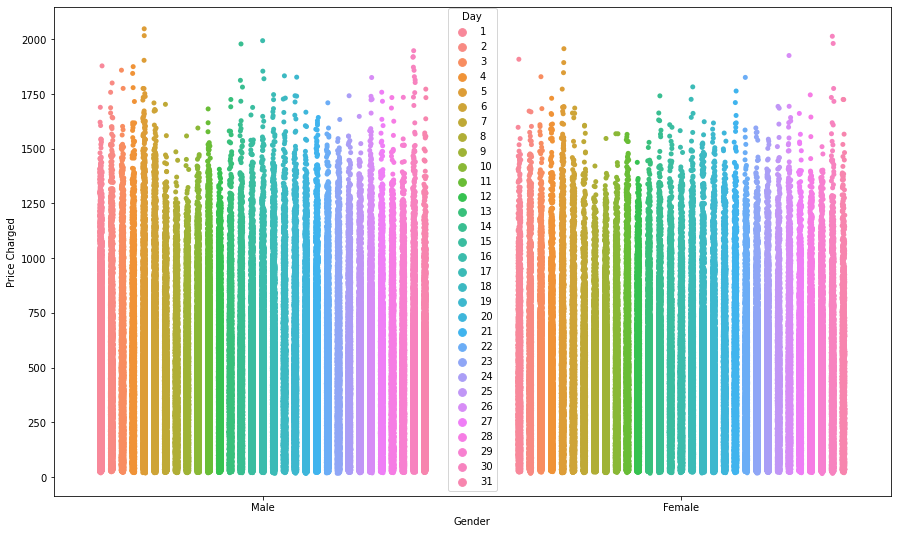

In [26]:
plt.figure(figsize=(15,9))
sns.stripplot(x="Gender", y="Price Charged", hue="Day", data = df, dodge=True)
plt.show()

### There is no discount for Female customers

<Figure size 1080x648 with 0 Axes>

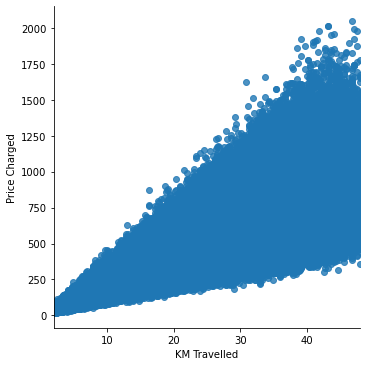

In [27]:
plt.figure(figsize=(15,9))
sns.lmplot(x='KM Travelled', y='Price Charged', data=df, ci=False);
plt.show()

<Figure size 1080x648 with 0 Axes>

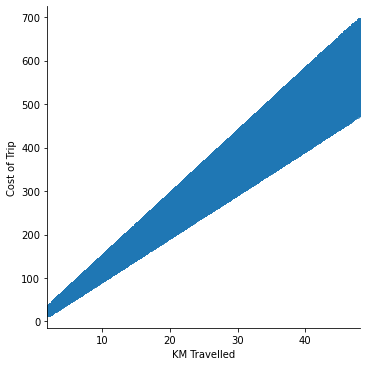

In [28]:
plt.figure(figsize=(15,9))
sns.lmplot(x='KM Travelled', y='Cost of Trip', data=df, ci=False);
plt.show()

### There is more pronounced linear relationship in Cost than Price charged as distance increases

In [29]:
city_cabs.unstack(level=1)

Company,Pink Cab,Yellow Cab
City,,
ATLANTA GA,1762,5795
AUSTIN TX,1868,3028
BOSTON MA,5186,24506
CHICAGO IL,9361,47264
DALLAS TX,1380,5637
DENVER CO,1394,2431
LOS ANGELES CA,19865,28168
MIAMI FL,2002,4452
NASHVILLE TN,1841,1169


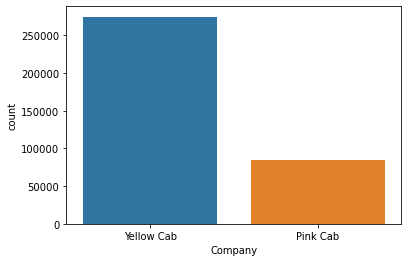

In [30]:
sns.countplot(x='Company', data=df);

### It is clear from the above fig that there are more yellow cabs than pink cabs. About 3x!!

In [31]:
df['Company'].value_counts(normalize=True)

Yellow Cab    0.764294
Pink Cab      0.235706
Name: Company, dtype: float64

### More than 76% cabs running are Yellow Cabs

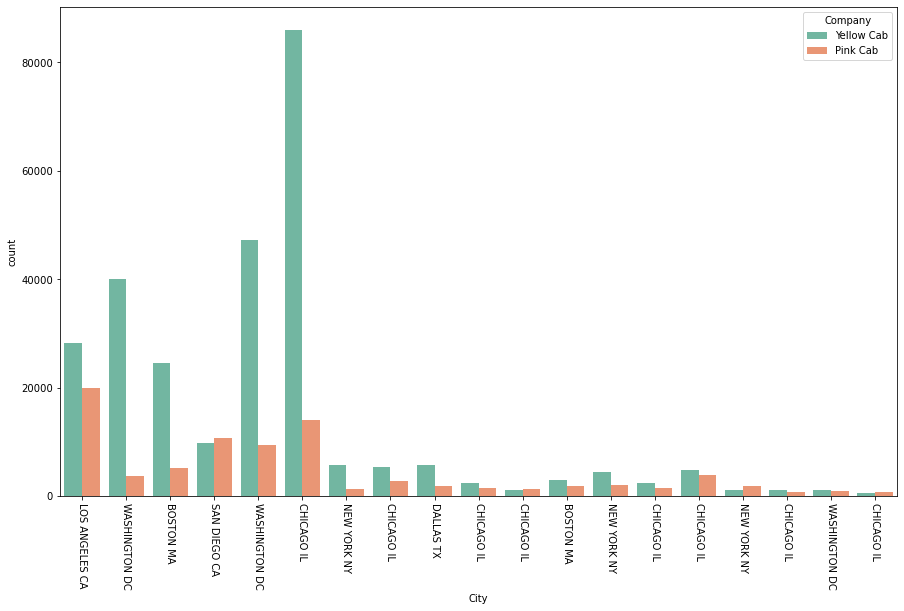

In [32]:
plt.figure(figsize=(15, 9))
g = sns.countplot(x='City', hue='Company', data=df, palette="Set2")
g.set_xticklabels(labels= df['City'],rotation=-90)
plt.show()

### Except San Diego, Chicago and New York 'Yellow Cab' Co. is dominant in all the cities

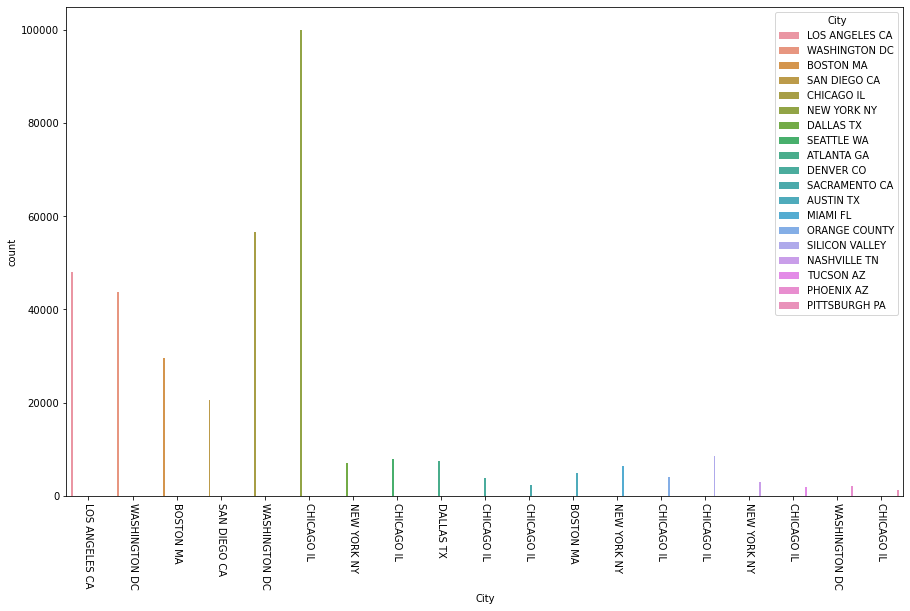

In [33]:
plt.figure(figsize=(15, 9))
g = sns.countplot(x='City', hue='City', data=df)
g.set_xticklabels(labels= df['City'],rotation=-90)
plt.show()

### Chicago has the highest no. of customers for cab service

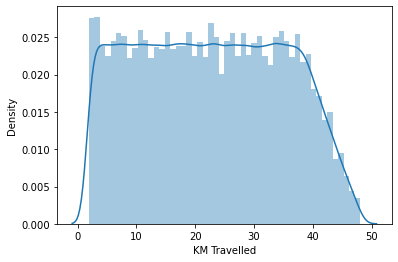

In [34]:
sns.distplot(df["KM Travelled"]);

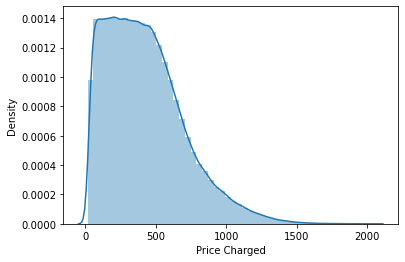

In [35]:
sns.distplot(df["Price Charged"]);

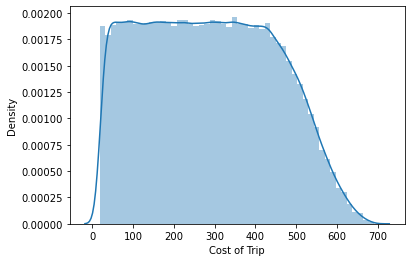

In [36]:
sns.distplot(df["Cost of Trip"]);

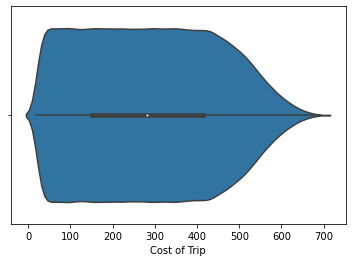

In [37]:
sns.violinplot(df["Cost of Trip"]);

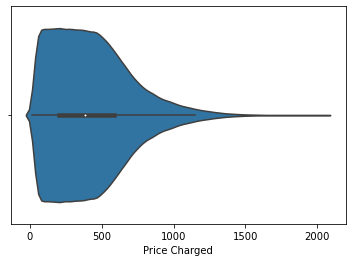

In [38]:
sns.violinplot(df["Price Charged"]);

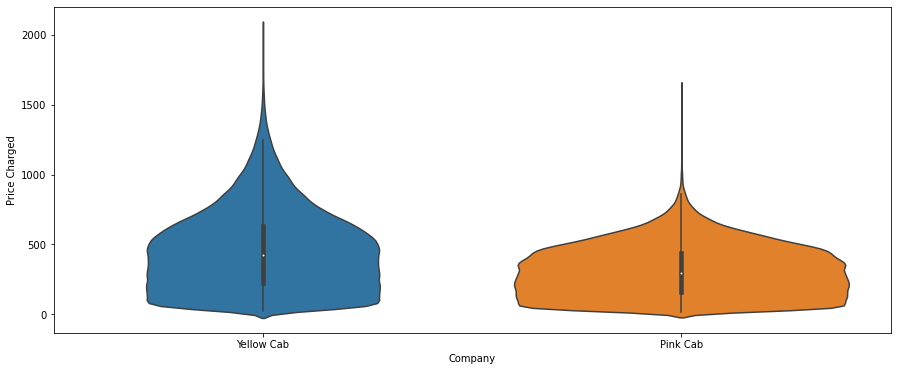

In [39]:
plt.figure(figsize=(15, 6))
sns.violinplot(x='Company', y='Price Charged', data=df)
plt.show()

### From above plots we can see the cost of the trip increases linearly all the time but the price chraged does not seem to follow the same pattern

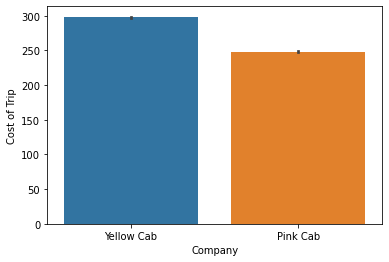

In [40]:
sns.barplot(y='Cost of Trip', x='Company', data=df, estimator=np.mean);

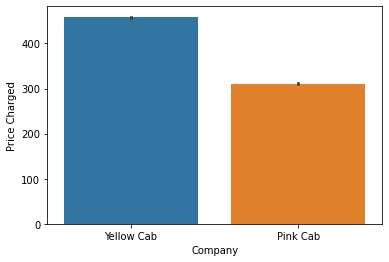

In [41]:
sns.barplot(y='Price Charged', x='Company', data=df, estimator=np.mean);

### Cost and Price both are higher for yellow cabs when compared to pink cabs

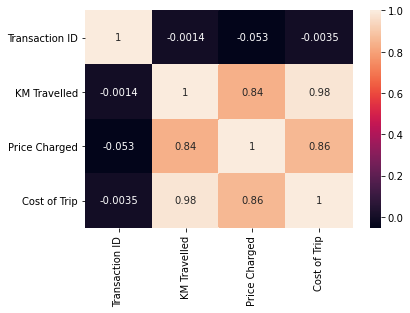

In [42]:
sns.heatmap(cab.corr(), color='b', annot=True);

### Light color => more correlation.
### KM Travelled is strongly correlated to Cost than the Price.

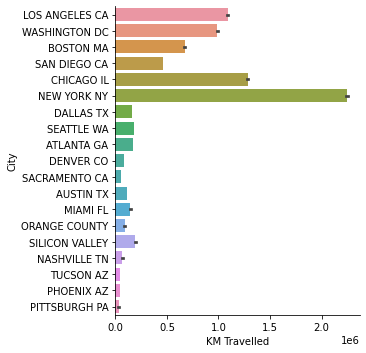

In [43]:
sns.factorplot(kind='bar', x='KM Travelled', y='City', data=df, estimator=np.sum);

### New York City has the highest no. of KM Travelled!

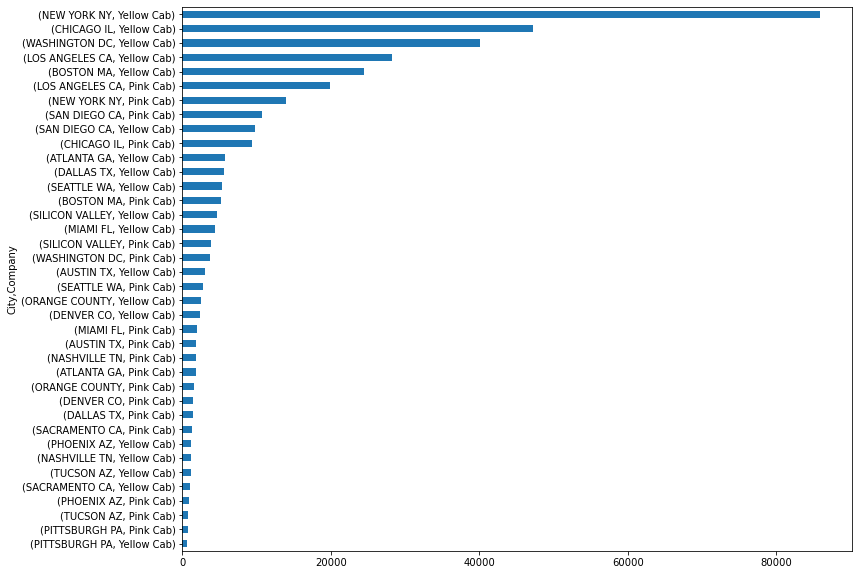

In [44]:
plt.figure(figsize=(12, 10))
df.groupby('City').Company.value_counts().sort_values(ascending=True).plot(kind='barh');

### Again New York City has most of the cabs as Yellow Cabs

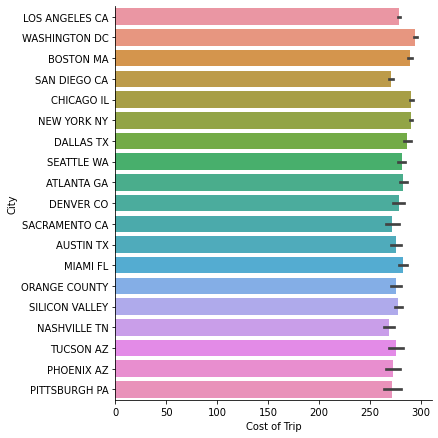

In [45]:
sns.catplot(kind = 'bar', x = 'Cost of Trip', y='City', data = df, estimator = np.mean, height=6);

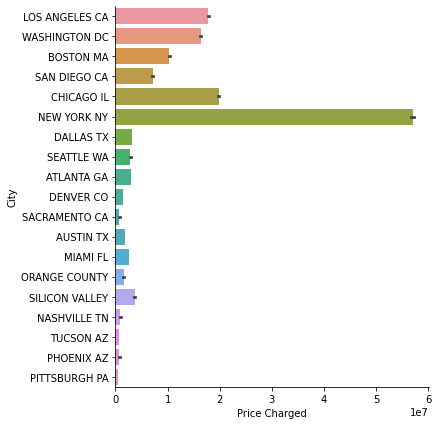

In [46]:
sns.catplot(kind = 'bar', x = 'Price Charged', y = 'City', data = df, estimator = np.sum, height=6);

### Price charged is max for New York City. But the cost is almost the same as other cities. It could mean that New York city is expensive.

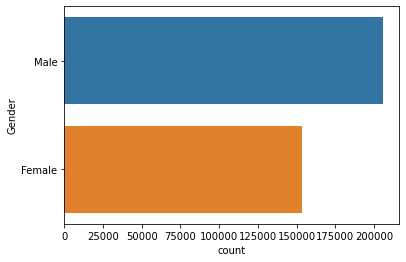

In [47]:
sns.countplot(y = 'Gender', data = df);

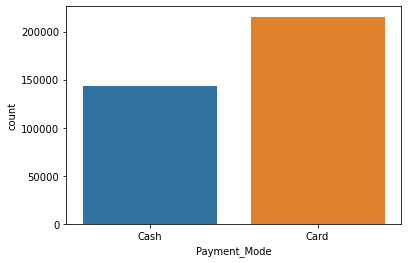

In [48]:
sns.countplot(df['Payment_Mode']);

In [49]:
df['Payment_Mode'].value_counts()

Card    215504
Cash    143888
Name: Payment_Mode, dtype: int64

### Card payment is preferred over cash payment. About 1.5x!!

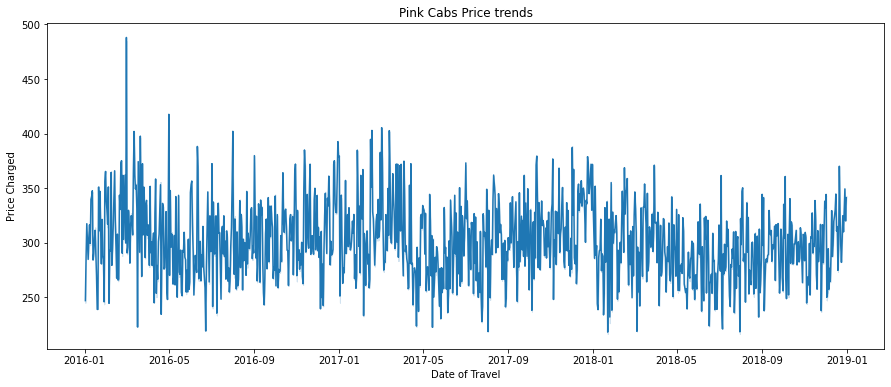

In [50]:
plt.figure(figsize=(15, 6))
sns.lineplot(x='Date of Travel', y='Price Charged', data=df[df['Company'] == 'Pink Cab'], ci=False).set_title("Pink Cabs Price trends")
plt.show()

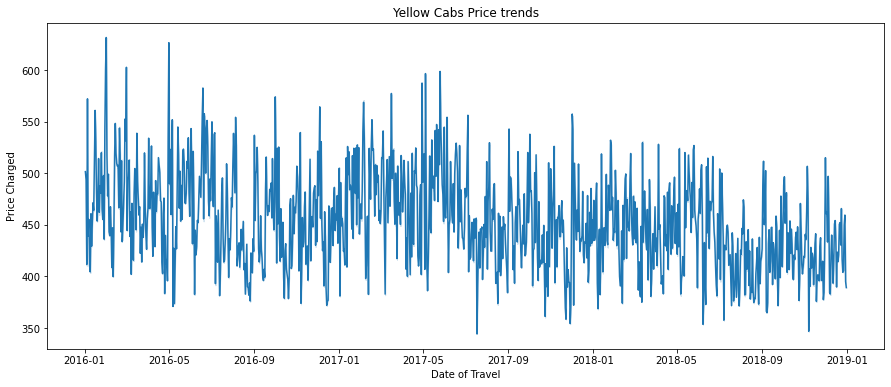

In [51]:
plt.figure(figsize=(15, 6))
sns.lineplot(x='Date of Travel', y='Price Charged', data=df[df['Company'] == 'Yellow Cab'], ci=False).set_title("Yellow Cabs Price trends")
plt.show()

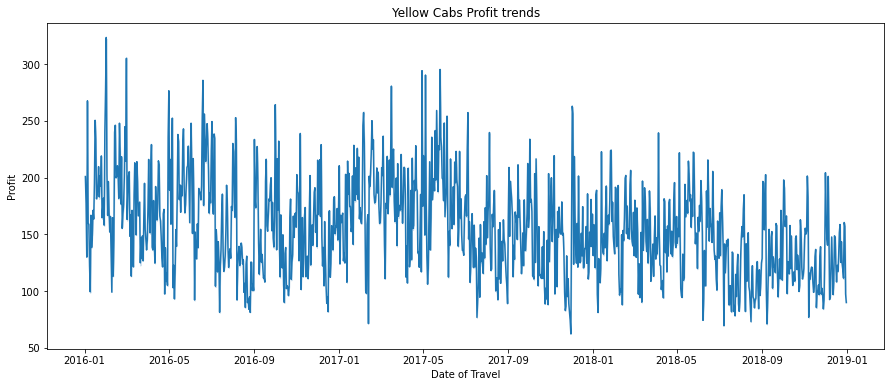

In [52]:
plt.figure(figsize=(15, 6))
sns.lineplot(x='Date of Travel', y='Profit', data=df[df['Company'] == 'Yellow Cab'], ci=False).set_title("Yellow Cabs Profit trends")
plt.show()

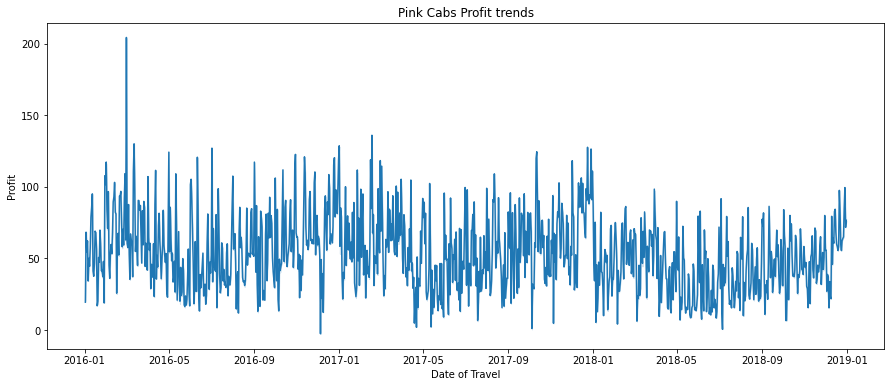

In [53]:
plt.figure(figsize=(15, 6))
sns.lineplot(x='Date of Travel', y='Profit', data=df[df['Company'] == 'Pink Cab'], ci=False).set_title("Pink Cabs Profit trends")
plt.show()

### It is clear that there is some seasonality

In [35]:
df.columns

Index(['Transaction ID', 'Company', 'City', 'KM Travelled', 'Price Charged',
       'Cost of Trip', 'Population', 'Users', 'Customer ID', 'Gender', 'Age',
       'Income (USD/Month)', 'Payment_Mode', 'Day', 'Weekday', 'Month', 'Year',
       'Profit', 'Profit Percentage per Trip', 'Price Charged per KM'],
      dtype='object')

In [50]:
df.groupby('Company')[['Profit', 'Profit Percentage per Trip']].sum()

,Profit,Profit Percentage per Trip
Company,,
Pink Cab,5.307328e+06,2165176.50
Yellow Cab,4.402037e+07,14914252.97


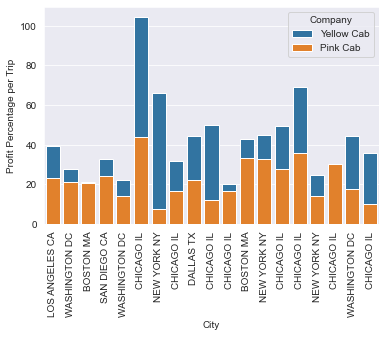

In [65]:
g = sns.barplot(x='City', y='Profit Percentage per Trip', hue='Company', data=df, dodge=0, ci=None);
g.set_xticklabels(labels=df['City'], rotation=90);

In [73]:
df['Population'] = df['Population'].str.replace(',', '').astype(float)
df['Users'] = df['Users'].str.replace(',', '').astype(float)

df.apply(pd.to_numeric(df['Population'], downcast='float'))
df.apply(pd.to_numeric(df['Users'], downcast='float'))

AttributeError: 'Series' object has no attribute 'series'

In [ ]:
g = sns.barplot(x='City', y='Population', hue='Company', data=df, dodge=0, ci=None);
g.set_xticklabels(labels=df['City'], rotation=90);

In [ ]:
g = sns.barplot(x='City', y='Users', hue='Company', data=df, dodge=0, ci=None);
g.set_xticklabels(labels=df['City'], rotation=90);